we will collect the Stock Data -- Apple
Preprocess the Data Train and Test
Create an Stacked LSTM Model
Predict the test data plot the output
Predict the future 30 days and plot the output

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
key='f2c9872ce91458e8284506d267ba08ca7de7e8d8'

In [4]:
dfg=pdr.get_data_tiingo('AAPL',api_key=key)
dfg.tail()

C:\Users\admin\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


close     high     low     open     volume  \
symbol date                                                                     
AAPL   2022-10-26 00:00:00+00:00  149.35  151.990  148.04  150.960   88436172   
       2022-10-27 00:00:00+00:00  144.80  149.046  144.13  148.070  109180150   
       2022-10-28 00:00:00+00:00  155.74  157.500  147.82  148.200  164762371   
       2022-10-31 00:00:00+00:00  153.34  154.240  151.92  153.155   97943171   
       2022-11-01 00:00:00+00:00  150.65  155.450  149.13  155.080   80379345   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2022-10-26 00:00:00+00:00    149.35  151.990  148.04  150.960   
       2022-10-27 00:00:00+00:00    144.80  149.046  144.13  148.070   
       2022-10-28 00:00:00+00:00    155.74  157.500  147.82  148.200   
       2022-10-31 00:00:00+00:00    153.34  154.240  151.92  153.155   
       2022-11-01 00:00:00+00:00    150.65  155.450  149.13  155.080   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2022-10-26 00:00:00+00:00   88436172      0.0          1.0  
       2022-10-27 00:00:00+00:00  109180150      0.0          1.0  
       2022-10-28 00:00:00+00:00  164762371      0.0          1.0  
       2022-10-31 00:00:00+00:00   97943171      0.0          1.0  
       2022-11-01 00:00:00+00:00   80379345      0.0          1.0

In [5]:
dfg.shape

(1257, 12)

In [7]:
dfg.to_csv('APPL.csv')

In [8]:
dfg.head()

close     high     low     open    volume  \
symbol date                                                                    
AAPL   2017-11-03 00:00:00+00:00  172.50  174.260  171.12  174.000  58683826   
       2017-11-06 00:00:00+00:00  174.25  174.990  171.72  172.365  34242566   
       2017-11-07 00:00:00+00:00  174.81  175.250  173.60  173.910  23910914   
       2017-11-08 00:00:00+00:00  176.24  176.240  174.33  174.660  23907639   
       2017-11-09 00:00:00+00:00  175.88  176.095  173.14  175.110  28636531   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-11-03 00:00:00+00:00  40.926202  41.343768  40.598792  41.282082   
       2017-11-06 00:00:00+00:00  41.341395  41.516962  40.741144  40.894172   
       2017-11-07 00:00:00+00:00  41.474257  41.578648  41.187180  41.260729   
       2017-11-08 00:00:00+00:00  41.813529  41.813529  41.360375  41.438669   
       2017-11-09 00:00:00+00:00  41.728118  41.779127  41.078044  41.545433   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-11-03 00:00:00+00:00  234735304      0.0          1.0  
       2017-11-06 00:00:00+00:00  136970264      0.0          1.0  
       2017-11-07 00:00:00+00:00   95643656      0.0          1.0  
       2017-11-08 00:00:00+00:00   95630556      0.0          1.0  
       2017-11-09 00:00:00+00:00  114546124      0.0          1.0

In [9]:
dfg.tail()

close     high     low     open     volume  \
symbol date                                                                     
AAPL   2022-10-26 00:00:00+00:00  149.35  151.990  148.04  150.960   88436172   
       2022-10-27 00:00:00+00:00  144.80  149.046  144.13  148.070  109180150   
       2022-10-28 00:00:00+00:00  155.74  157.500  147.82  148.200  164762371   
       2022-10-31 00:00:00+00:00  153.34  154.240  151.92  153.155   97943171   
       2022-11-01 00:00:00+00:00  150.65  155.450  149.13  155.080   80379345   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2022-10-26 00:00:00+00:00    149.35  151.990  148.04  150.960   
       2022-10-27 00:00:00+00:00    144.80  149.046  144.13  148.070   
       2022-10-28 00:00:00+00:00    155.74  157.500  147.82  148.200   
       2022-10-31 00:00:00+00:00    153.34  154.240  151.92  153.155   
       2022-11-01 00:00:00+00:00    150.65  155.450  149.13  155.080   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2022-10-26 00:00:00+00:00   88436172      0.0          1.0  
       2022-10-27 00:00:00+00:00  109180150      0.0          1.0  
       2022-10-28 00:00:00+00:00  164762371      0.0          1.0  
       2022-10-31 00:00:00+00:00   97943171      0.0          1.0  
       2022-11-01 00:00:00+00:00   80379345      0.0          1.0

In [10]:
df1=dfg.reset_index()['close']
df1

0       172.50
1       174.25
2       174.81
3       176.24
4       175.88
         ...  
1252    149.35
1253    144.80
1254    155.74
1255    153.34
1256    150.65
Name: close, Length: 1257, dtype: float64

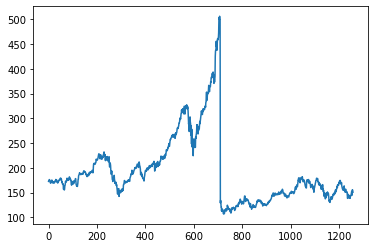

In [11]:
plt.plot(df1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
df1=sc.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)   # this is between 0 to 1

[[0.16445836]
 [0.16884158]
 [0.17024421]
 ...
 [0.12247965]
 [0.11646838]
 [0.10973075]]


In [14]:
df1.shape

(1257, 1)

### train test spilt

In [15]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [27]:
(df1[0:training_size]).shape

(817, 1)

In [28]:
training_size,test_size

(817, 440)

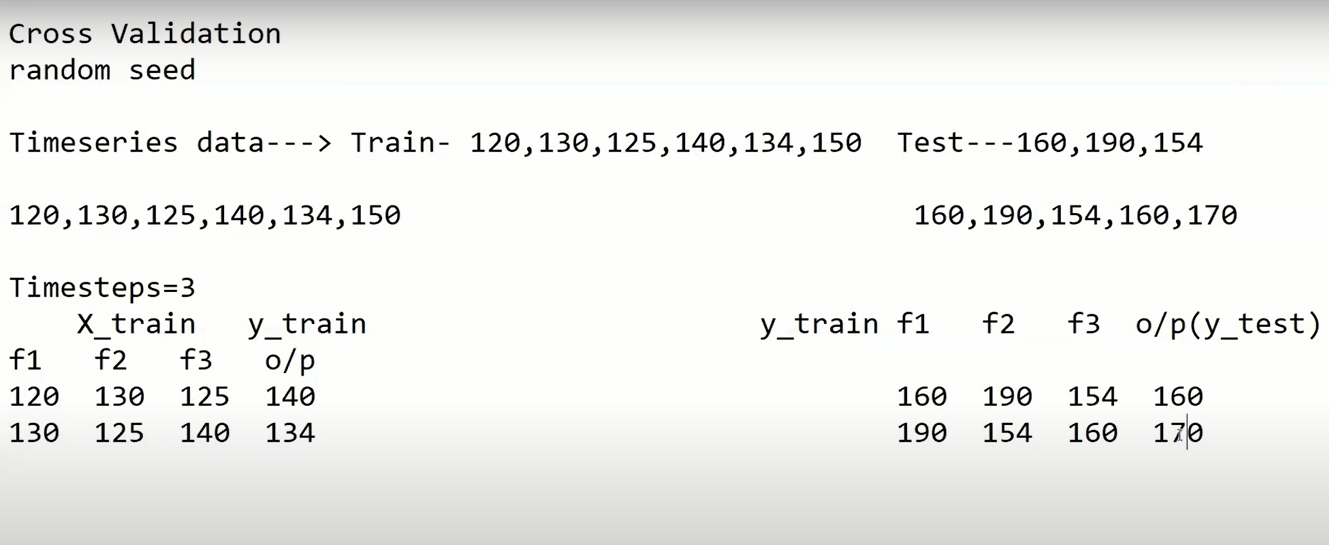

In [45]:
# convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX , dataY =[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i: (i+time_step),0]     # i?= 0,1,2,3,----99 100
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [46]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [49]:
print(X_train.shape), print(y_train.shape)    # train

(716, 100)
(716,)


(None, None)

In [52]:
print(X_test.shape), print(y_test.shape)    # test

(339, 100)
(339,)


(None, None)

In [53]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [54]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 17s 372ms/step - loss: 0.0401 - val_loss: 0.0027
Epoch 2/100
12/12 [==============================] - 2s 205ms/step - loss: 0.0146 - val_loss: 0.0078
Epoch 3/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0119 - val_loss: 9.2265e-04
Epoch 4/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0098 - val_loss: 4.2123e-04
Epoch 5/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0089 - val_loss: 2.9942e-04
Epoch 6/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0082 - val_loss: 4.9200e-04
Epoch 7/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0072 - val_loss: 4.5787e-04
Epoch 8/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0067 - val_loss: 4.1544e-04
Epoch 9/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0056 - val_loss: 4.0070e-04
Epoch 10/100
12/12 [==============================] - 2s 199ms

12/12 [==============================] - 2s 198ms/step - loss: 0.0034 - val_loss: 2.8391e-04
Epoch 79/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0031 - val_loss: 2.1757e-04
Epoch 80/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0035 - val_loss: 2.2726e-04
Epoch 81/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0029 - val_loss: 1.8864e-04
Epoch 82/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0028 - val_loss: 8.3126e-04
Epoch 83/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0027 - val_loss: 2.6247e-04
Epoch 84/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0029 - val_loss: 2.1310e-04
Epoch 85/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0024 - val_loss: 2.8817e-04
Epoch 86/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0022 - val_loss: 2.2432e-04
Epoch 87/100
12/12 [==============================] - 2s 20

In [58]:
import tensorflow as tf

In [59]:
tf.__version__

'2.9.1'

In [60]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 42ms/step


In [62]:
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [63]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

235.9156964899598

In [65]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

157.76986860430424

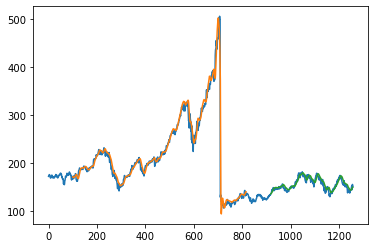

In [70]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(sc.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [71]:
len(test_data)


440

In [77]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [78]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [79]:
temp_input


[0.07586725109580456,
 0.0627175954915466,
 0.06492172824045078,
 0.07160926737633061,
 0.05815904821540385,
 0.061916092673763246,
 0.0727113337507827,
 0.07140889167188474,
 0.07872260488415778,
 0.08721352536005006,
 0.08721352536005006,
 0.07664370695053219,
 0.08112711333750777,
 0.07484032561051968,
 0.08037570444583592,
 0.08696305572949276,
 0.09036944270507191,
 0.09896055103318718,
 0.10068879148403248,
 0.09525360050093923,
 0.0977332498434565,
 0.09680651221039449,
 0.10427050720100184,
 0.10852849092047584,
 0.1007639323731997,
 0.11060738885410137,
 0.11571696931747022,
 0.12150281778334371,
 0.1183469004383218,
 0.11549154664996863,
 0.11211020663744514,
 0.12510958046336873,
 0.12651221039448962,
 0.139436443331246,
 0.13693174702567307,
 0.13317470256731367,
 0.1485034439574201,
 0.1477019411396368,
 0.14654978083907322,
 0.1453475266123982,
 0.14547276142767684,
 0.15629304946775202,
 0.1544145272385723,
 0.16345648090169063,
 0.16618659987476514,
 0.16578584846587346

In [80]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.112758]
101
1 day input [0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711
 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879
 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849 0.10076393
 0.11060739 0.11571697 0.12150282 0.1183469  0.11549155 0.11211021
 0.12510958 0.12651221 0.13943644 0.13693175 0.1331747  0.14850344
 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453
 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376
 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614
 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068
 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263 0.11403882
 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971
 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224
 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094
 0.07889793 0.09054477 0.07899812 0

11 day output [[0.12624668]]
12 day input [0.08112711 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055
 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849
 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469  0.11549155
 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175 0.1331747
 0.14850344 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305
 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111
 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666
 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897
 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263
 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556
 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728
 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077
 0.08050094 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834
 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464
 0.09507827 0.12247965

20 day output [[0.13467476]]
21 day input [0.09680651 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697
 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221
 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978
 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866
 0.16578585 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861
 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866
 0.12804008 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623
 0.14174076 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373
 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131 0.11251096
 0.10770194 0.08926738 0.07854728 0.08919224 0.09833438 0.09908579
 0.09665623 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477
 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487
 0.10672511 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838
 0.10973075 0.112758   0.11458337 0.11612178 0.1174919  0.11876306
 0.11996816 0.12112013 

28 day output [[0.14238359]]
29 day input [0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498
 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073
 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016
 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738
 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115
 0.0841077  0.08050094 0.07889793 0.09054477 0.07899812 0.08909205
 0.09244834 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368
 0.10647464 0.09507827 0.12247965 0.11646838 0.10973075 0.112758
 0.11458337 0.11612178 0.1174919  0.11876306 0.11996816 0.12112013
 0.12222403 0.12328331 0.12430264 0.12528799 0.12624668 0.1271863
 0.1281143  0.12903716 

In [81]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [82]:
len(df1)

1257

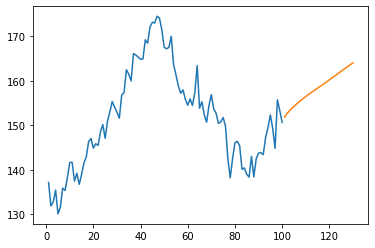

In [85]:
plt.plot(day_new,sc.inverse_transform(df1[1157:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))